<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
None
              Value
DATE               
1985-01-01  72.5052
1985-02-01  70.6720
1985-03-01  62.4502
1985-04-01  57.4714
1985-05-01  55.3151


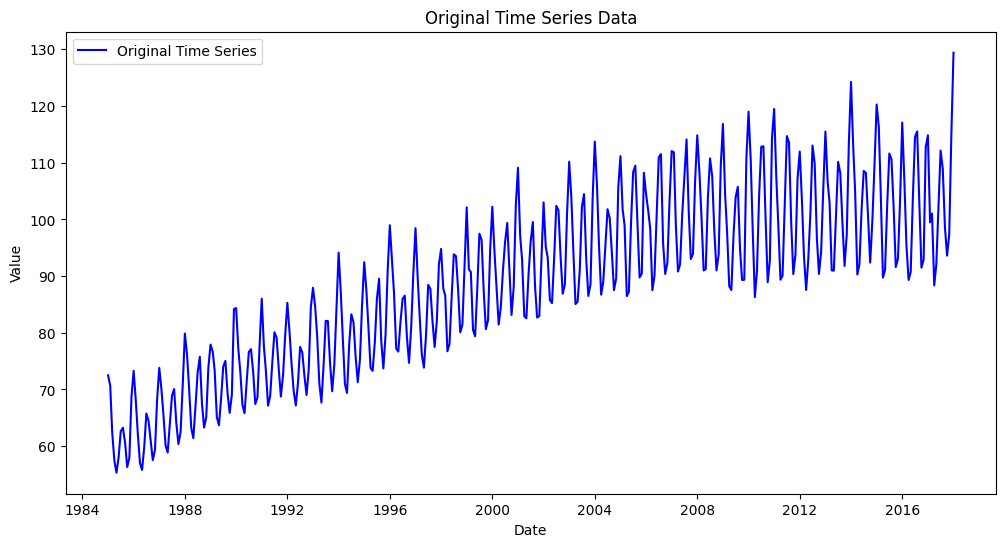

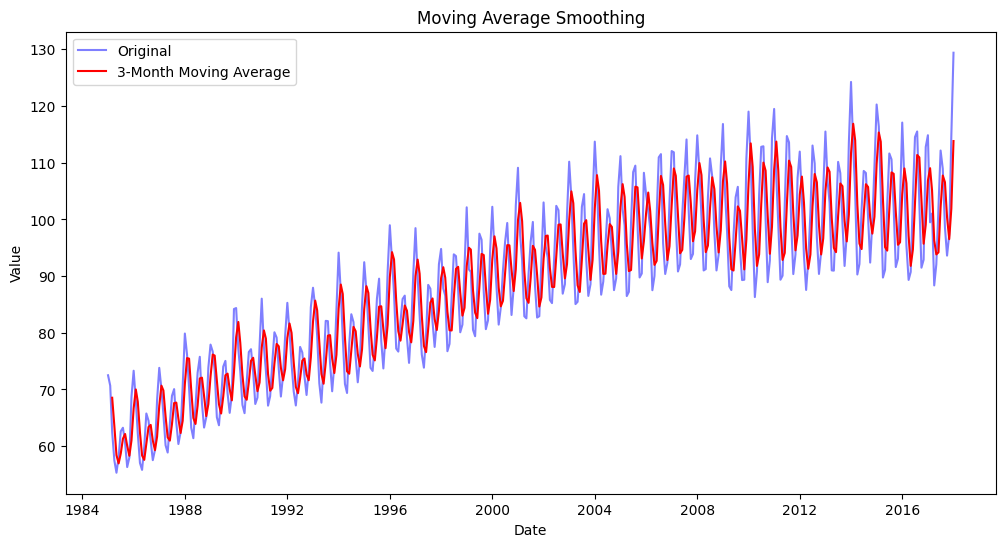

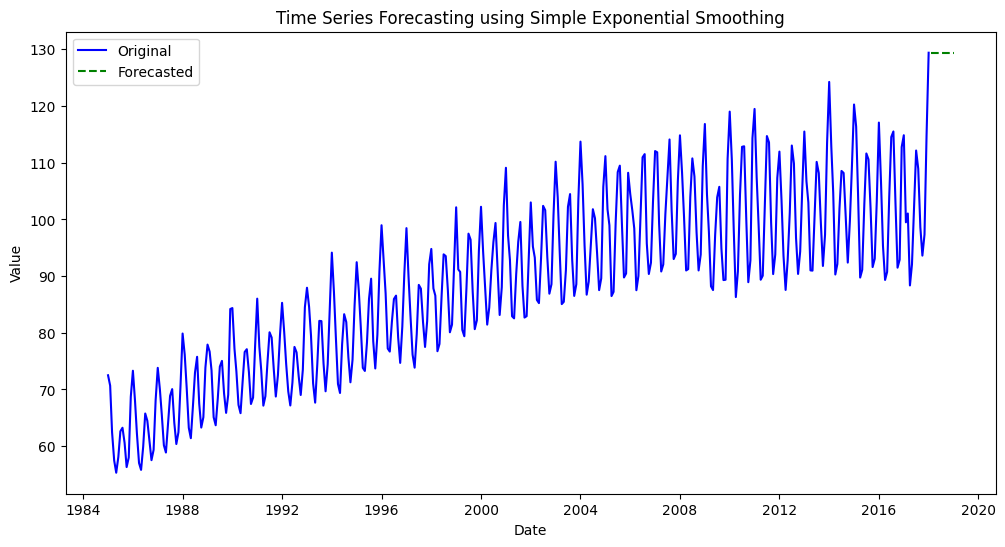

Forecasted Values:
            Forecast
2018-02-01  129.4048
2018-03-01  129.4048
2018-04-01  129.4048
2018-05-01  129.4048
2018-06-01  129.4048
2018-07-01  129.4048
2018-08-01  129.4048
2018-09-01  129.4048
2018-10-01  129.4048
2018-11-01  129.4048
2018-12-01  129.4048
2019-01-01  129.4048


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Step 1: Load and preprocess the dataset
file_path = "Electric_Production.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Convert DATE column to datetime format and set as index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Ensure time series has a fixed frequency (Month Start)
df = df.asfreq('MS')

# Check dataset info after preprocessing
print(df.info())
print(df.head())

# Step 2: Visualizing the Original Time Series
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label="Original Time Series", color='blue')
plt.title("Original Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 3: Apply Moving Average Smoothing (Rolling Mean)
df['Moving_Avg'] = df['Value'].rolling(window=3).mean()  # 3-month moving average

# Plot Smoothed Data
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label="Original", color='blue', alpha=0.5)
plt.plot(df['Moving_Avg'], label="3-Month Moving Average", color='red')
plt.title("Moving Average Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 4: Apply Simple Exponential Smoothing for Forecasting
model = SimpleExpSmoothing(df['Value'], initialization_method="heuristic")
fitted_model = model.fit(optimized=True)

# Step 5: Forecast Future Values (Next 12 Months)
forecast_steps = 12  # Predict for the next 12 months
forecast_values = fitted_model.forecast(steps=forecast_steps)

# Creating a future index for forecasted values
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Convert forecast values into a DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_index)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label="Original", color='blue')
plt.plot(forecast_df['Forecast'], label="Forecasted", color='green', linestyle='dashed')
plt.title("Time Series Forecasting using Simple Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Display the forecasted values
print("Forecasted Values:")
print(forecast_df)
